In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()

In [0]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [0]:
df['target'] = iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# visualization
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

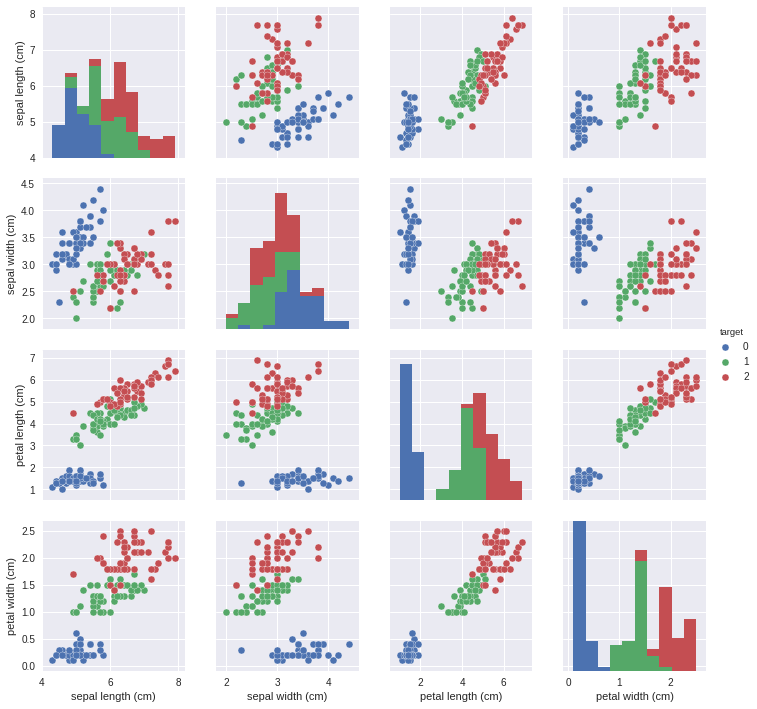

In [9]:
sns.pairplot(df, hue='target', vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'])

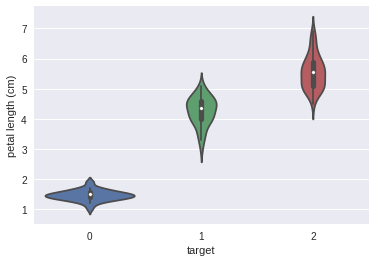

In [10]:
# violinplots on petal-length for each target species
sns.violinplot(data=df,x="target", y="petal length (cm)" );

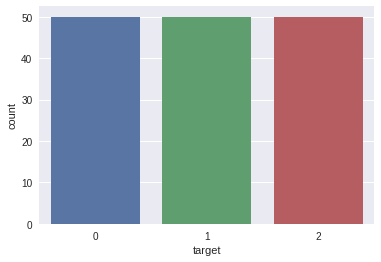

In [11]:
sns.countplot(df.target)

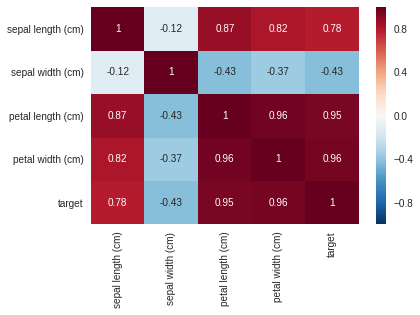

In [12]:
sns.heatmap(df.corr(), annot=True);

In [0]:
X, y = load_iris(return_X_y=True)

In [0]:
from sklearn.model_selection import train_test_split
SEED = 123

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = SEED )

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [0]:

models = {'Logistic Regression': LogisticRegression(multi_class='ovr', solver='liblinear'),
          'Decision Tree': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier() }

In [0]:
#results = { 'classifier': [], 'accuracy': [], 'f1_score':[]  }
results = { 'classifier': [], 'accuracy': []}


In [19]:
for clf_name, clf in models.items():
  print('Training Classifier.....', clf_name)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  #pd.DataFrame(confusion_matrix(y_test, y_pred))
  f1_score_value = f1_score(y_test, y_pred, average='macro')
  results['classifier'].append(clf_name)
  results['accuracy'].append(acc_score)
  #results['f1_score'].append(f1_score_value)
  print(classification_report(y_test, y_pred))

  print('Training complete')

Training Classifier..... Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Training complete
Training Classifier..... Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

   micro avg       0.96      0.96      0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Training complete
Training Classifier..... Random Forest
              precision    recall  f1-score   support

           0       1.00 

In [0]:
df_results = pd.DataFrame(results).set_index('classifier')

In [21]:
df_results

,accuracy
classifier,
Logistic Regression,0.977778
Decision Tree,0.955556
Random Forest,0.933333
Gradient Boosting,0.911111


In [22]:
df_results.sort_values(by='accuracy', ascending=False )

,accuracy
classifier,
Logistic Regression,0.977778
Decision Tree,0.955556
Random Forest,0.933333
Gradient Boosting,0.911111


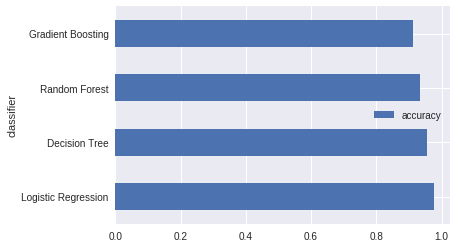

In [23]:
df_results.plot(kind='barh')